# Astronomical Telescopes and Instruments 2020: Exercise Set 1
## Auke Bruinsma, s1594443

Welcome to the first exercise class for ATI 2020. The exercise classes will mostly be in the form of Jupyter notebooks. You are expected to send the completed notebook to a TA before the start of the next lecture. Exercises will be *italic*.

***Make sure your code works when run from scratch! You can do this using the menu above 'Kernel/Restart & Run all'.***

*Upload the finished notebook to Brightspace before the start of the next lecture!*

These are the packages you need for this exercise set. You are welcome to add extra, but this should not be necessary.

In [49]:
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline

### Exercise 1: Sellmeier Coefficients

In this exercise you will write and plot a function giving the index of refraction of a particular glass. You will use three types of glass: BK7, FS (fused silica), and F2. These have the following Sellmeier coefficients (given here in arrays $[B_1, B_2, B_3]$ and $[C_1, C_2, C_3]$):

In [50]:
BK7_B = np.array([1.03961212E0, 2.31792344E-1, 1.01046945E0])
BK7_C = np.array([6.00069867E-3, 2.00179144E-2, 1.03560653E2])

FS_B = np.array([6.961663E-1, 4.079426E-1, 8.974794E-1]) 
FS_C = np.array([4.679148E-3, 1.351206E-2, 9.7934E1])

F2_B = np.array([1.39757037E0, 1.59201403E-1, 1.2686543E0])
F2_C = np.array([9.95906143E-3, 5.46931752E-2, 1.19248346E2])

*Write a function that accepts the name of a glass and a wavelength as input and returns the index of refraction of that particular glass.*

In [51]:
# Function that computes the refraction index.
def compute_refraction_index(B, C, l):
    # Formula taken from slide 27 of the first lecture.
    part_0 = B[0] / (l**2 - C[0]) # I have divided the equation into several parts for clarity.
    part_1 = B[1] / (l**2 - C[1])
    part_2 = B[2] / (l**2 - C[2])
    return np.sqrt(1 + l**2 * (part_0 + part_1 + part_2))

In [52]:
# Setting the wavelength.
l = 1 # Wavelength in micrometers.

# Computation.
n_BK7 = compute_refraction_index(BK7_B, BK7_C, l)
n_FS = compute_refraction_index(FS_B, FS_C, l)
n_F2 = compute_refraction_index(F2_B, F2_C, l) 

# Printing the results.
print(f'n = {n_BK7:.3f} for BK7')
print(f'n = {n_FS:.3f} for FS')
print(f'n = {n_F2:.3f} for F2')

n = 1.508 for BK7
n = 1.450 for FS
n = 1.603 for F2


*Use the function you wrote above to replicate the glass dispersion plot in the lecture for these three glasses. Let the wavelength run from 0.2 $\mu$m to 1.6 $\mu$m.*

In [53]:
# Computation
l_array = np.linspace(0.2, 1.6, 100) # Wavelength array.

n_BK7_array = compute_refraction_index(BK7_B, BK7_C, l_array)
n_FS_array = compute_refraction_index(FS_B, FS_C, l_array)
n_F2_array = compute_refraction_index(F2_B, F2_C, l_array)

/home/auke/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:7: RuntimeWarning: invalid value encountered in sqrt
  import sys


**Comment**: Runtimewarning occurs because for low values for the F2 type glass invalid values occurs.

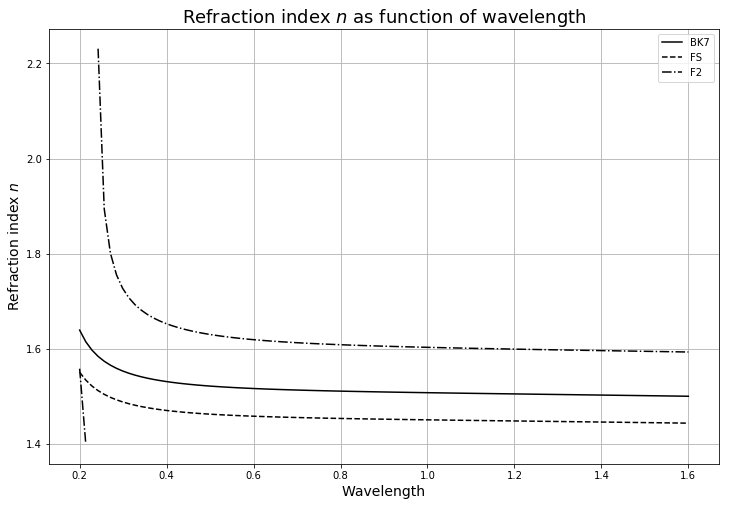

In [54]:
# Plotting
plt.figure(figsize=(12,8))

plt.title('Refraction index $n$ as function of wavelength', fontsize=18)
plt.ylabel('Refraction index $n$', fontsize=14)
plt.xlabel('Wavelength', fontsize=14)

plt.plot(l_array, n_BK7_array, linestyle='-', color='k', label='BK7')
plt.plot(l_array, n_FS_array, linestyle='--', color='k', label='FS')
plt.plot(l_array, n_F2_array, linestyle='-.', color='k', label='F2')

plt.grid()
plt.legend()
plt.show()
plt.close()

**Comment**: This figure is in accordance with slide 23 of the first lecture, so I conclude that the implementation is correct.

### Exercise 2: Fresnel Equations

*Write a function that calculates the **transmission** ~~intensity~~ and reflection coefficients for a given angle of incidence, index of refraction for the glass, and index of refraction for the surrounding medium.*

In [55]:
# Function that computes transmission and reflection coefficients.
def compute_coefficients(n1, n2, theta_i):
    '''
    theta_i = angle of incidence
    n1 = index of refraction for the glass
    n2 = index of refraction for the surrounding medium.
    '''
    root_part = np.sqrt(n2**2 - n1**2 * np.sin(theta_i)**2)
    
    # Formulas taken from slide 46 of the first lecture.
    t_s = (2*n1 * np.cos(theta_i)) / (n1 * np.cos(theta_i) + root_part)
    t_p = (2*n1*n2 * np.cos(theta_i)) / ((n2**2 * np.cos(theta_i)) + (n1*root_part))
    r_s = (n1*np.cos(theta_i) - root_part) / (n1*np.cos(theta_i) + root_part)
    r_p = (n2**2 * np.cos(theta_i) - n1*root_part) / (n2**2 * np.cos(theta_i) + n1*root_part)
    
    return t_s, t_p, r_s, r_p

In [56]:
# Compute transmission angle (will be used later).
def compute_angle_transmission(n1, n2, theta_i):
    return np.arcsin(n1 * np.sin(theta_i) / n2) # Snell's law.

# Compute reflectivity and transmissivity.
def compute_R_and_T(t_s, t_p, r_s, r_p, n1, n2, theta_i_array, theta_t_array):
    # The reflectivity and transmissivity formulas from slide 53 of the first lecture.
    T_s = ((n2 * np.cos(theta_t_array)) / (n1 * np.cos(theta_i_array))) * np.abs(t_s)**2
    T_p = ((n2 * np.cos(theta_t_array)) / (n1 * np.cos(theta_i_array))) * np.abs(t_p)**2
    R_s = np.abs(r_s)**2
    R_p = np.abs(r_p)**2
    return T_s, T_p, R_s, R_p



*Use the function you wrote above to replicate the 'Reflection and Transmission' plot from the lecture.*

In [57]:
# Computation so the plot from slide 54 can be reproduced.
n1 = 1
n2 = 1.55

theta_i_array = np.linspace(0, 0.5*np.pi, 1000)
theta_t_array = compute_angle_transmission(n1, n2, theta_i_array)

t_s, t_p, r_s, r_p = compute_coefficients(n1, n2, theta_i_array)
T_s, T_p, R_s, R_p = compute_R_and_T(t_s, t_p, r_s, r_p, n1, n2, theta_i_array, theta_t_array)

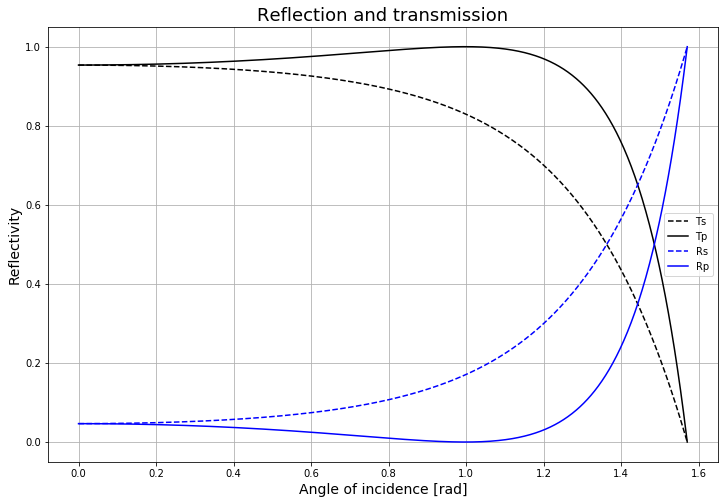

In [58]:
# Plotting
plt.figure(figsize=(12,8))

plt.title('Reflection and transmission', fontsize=18)
plt.ylabel('Reflectivity', fontsize=14)
plt.xlabel('Angle of incidence [rad]', fontsize=14)

plt.plot(theta_i_array, T_s, linestyle='--', color='k', label='Ts')
plt.plot(theta_i_array, T_p, linestyle='-', color='k', label='Tp')
plt.plot(theta_i_array, R_s, linestyle='--', color='b', label='Rs')
plt.plot(theta_i_array, R_p, linestyle='-', color='b', label='Rp')

plt.grid()
plt.legend()
plt.show()
plt.close()

**Comment**: This looks like the figure from slide 54 of the first lecture, so I conclude that everything is implemented as intended.

(Not part of the exercise, just something to think about: why does the polarization not matter for $R,T$ at incidences of $0$ or $90$ degrees? Why does the $R_p$ curve go to zero at $\sim 60$ degrees?)

Finally we will do a sanity check whether your code agrees with a simple analytical result. 

*Use your code for the Fresnel equations to calculate the intensity of the reflected light for normal incidence (incoming beam is perpendicualr to interface) for the following materials:*
1. *Glass with an index of refraction of $1.55$,*
2. *Diamond with an index of refraction of $2.42$,*
3. *Aluminum with a complex index of refraction of $0.8+6.0 i$*

*Compare this with the analytical result 
$R=\frac{(n-1)^2+k^2}{(n+1)^2 + k^2}$ (Hecht, 4th edition, equation 4.67)*


In [59]:
# Setting up parameters.
n = 1
k = 6
n_glass = 1.55
n_dia = 2.42
n_alu = 0.8 + 6j
theta_incidence = 0

In [60]:
def compute_reflective_intensity(r_s, r_p):
    return np.abs(r_s)**2 + np.abs(r_p)**2

In [61]:
def analytical_result(n, k):
    return np.abs(((n-1)**2 + k**2)/((n+1)**2 + k**2))

In [62]:
t_s_glass, t_p_glass, r_s_glass, r_p_glass = compute_coefficients(n, n_glass, theta_incidence)
t_s_dia, t_p_dia, r_s_dia, r_p_dia = compute_coefficients(n, n_dia, theta_incidence)
t_s_alu, t_p_alu, r_s_alu, r_p_alu = compute_coefficients(n, n_alu, theta_incidence)

R_glass = compute_reflective_intensity(r_s_glass, r_p_glass)
R_dia = compute_reflective_intensity(r_s_dia, r_p_dia)
R_alu = compute_reflective_intensity(r_s_alu, r_p_alu)

R_glass_ana = analytical_result(n_glass, k)
R_dia_ana = analytical_result(n_dia, k)
R_alu_ana = analytical_result(n_alu, k)

In [63]:
print(n_alu**2)
print((n_alu-1)**2)

(-35.36+9.600000000000001j)
(-35.96-2.3999999999999995j)


In [64]:
print(f'R_glass = {R_glass:.3f}, R_glass_ana = {R_glass_ana:.3f}')
print(f'R_dia = {R_dia:.3f}, R_dia_ana = {R_dia_ana:.3f}')
print(f'R_alu = {R_alu:.3f}, R_alu_ana = {R_alu_ana:.3f}')

R_glass = 0.093, R_glass_ana = 0.854
R_dia = 0.345, R_dia_ana = 0.797
R_alu = 1.837, R_alu_ana = 0.110


**Discussion**:
Glass has a relatively low reflectivity, that seems correct to me.
The fact that aluminium has a reflectivity higher than 1 seems odd to me, don't really know if this is correct or not, maybe it's because of the complex part of the index of refraction.

The analytical formula does not really give comparible results, don't know why.

***Make sure your code works when run from scratch! You can do this using the menu above 'Kernel/Restart & Run all'.***

*Upload the finished notebook to Brightspace before the start of the next lecture!*